### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.

In [244]:
# Importing packages
library(dplyr)
library(ggplot2)
library(repr)
library(reshape2)
library(tidyverse)

In [245]:
# Loading data sets and assigning them to data frames.
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [246]:
# Exploring New York City data.
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [247]:
# Exploring washington data.
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [248]:
# Exploring Chicago data.
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


## Question 1


**What is city has the longest average trip duration?**

In [249]:
# Creating a function to calculate average trip duration.
durationCalc <- function(city) {  
   # Function reassigns data frames to themselves without missing values.
   # Prints the Trip.Duration mean in munites based on the city the user enters.
    
    ny <- na.omit(ny)
    wash <- na.omit(wash)
    chi <- na.omit(chi)
    
    if (city == 'ny'){
       print(mean(ny[["Trip.Duration"]]) / 60)
   } else if (city == 'wash'){
       print(mean(wash[["Trip.Duration"]]) / 60)
    }else if (city == 'chi'){
       print(mean(chi[["Trip.Duration"]]) / 60)
    } else{
        print("Please enter 'ny', 'wash', or 'chi'.")
    }
}

In [250]:
# Using the new fuction to find average Trip.Duration of 'ny'.
nyDuration = durationCalc('ny')

[1] 13.25573


In [251]:
# Using the new fuction to find average Trip.Duration of 'wash'.
washDuration = durationCalc('wash')

[1] 20.56589


In [252]:
# Using the new fuction to find average Trip.Duration of 'chi'.
chiDuration = durationCalc('chi')

[1] 11.41712


In [253]:
# testing the else portion of function.
durationCalc('dallas')

[1] "Please enter 'ny', 'wash', or 'chi'."


**My anlyasis shows that Washington bike sharing users ride the bikes the longest with an average trip duration of 20.6 minutes. Followed by New York City at 13.3 minutes and lastly Chicago at 11.4 minutes.**

In [254]:
# Creating a data frame to use for our bar chart.
durationData <- data.frame(City=rep(c('New York City', 'Washington', 'Chicago')), TripDuration=rep(c(nyDuration, washDuration, chiDuration)))

In [255]:
# Verifying data frame is correct.
durationData

City,TripDuration
New York City,13.25573
Washington,20.56589
Chicago,11.41712


In [256]:
# Using the repr library to adjust the following plots.
options(repr.plot.width=10, repr.plot.height=5)

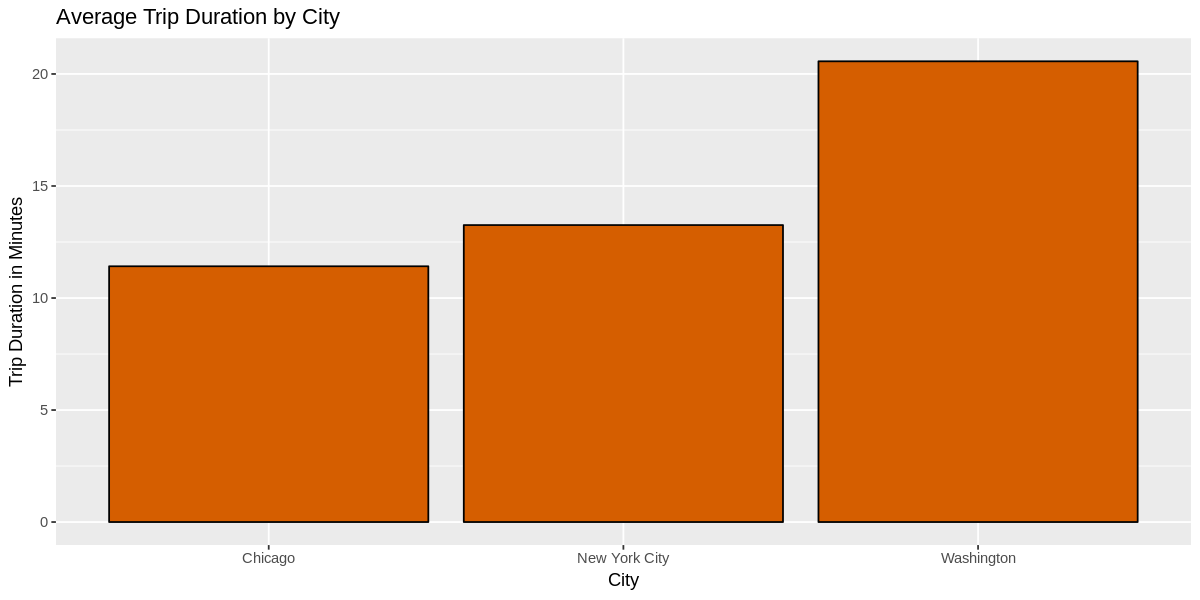

In [257]:
#Plotting our new data frame to help visualize our results.
ggplot(durationData, aes(y=TripDuration, x=City)) +
  geom_bar(position='dodge', stat='identity', fill='#D55E00', colour='black') +
  ggtitle('Average Trip Duration by City') +
  xlab('City') +
  ylab('Trip Duration in Minutes')

> **The bar chart above helps us visualize our findings above. Washington has the longest trip duration at 20.6 minutes, followed by New York City at 13.3 minutes, and lastly Chicago with the shortest duration at 11.4 minutes.**

## Question 2

**Which city has the highest percentage of subscribers based off their total users.**

In [258]:
# Displaying the New York City Customer/Subscriber counts..
table(ny$User.Type)


             Customer Subscriber 
       119       5558      49093 

In [259]:
# Calculating subscriber percentage and assigning it to a variable.
nyPercent = (49093 / (5558 + 49093))
nyPercent

[1] 0.8983001

In [260]:
# Displaying the Washington Customer/Subscriber counts.
table(wash$User.Type)


             Customer Subscriber 
         1      23450      65600 

In [261]:
# Calculating subscriber percentage and assigning it to a variable.
washPercent = (65600 / (23450 + 65600))
washPercent

[1] 0.7366648

In [262]:
# Displaying the Chicago Customer/Subscriber counts.
table(chi$User.Type)


             Customer Subscriber 
         1       1746       6883 

In [263]:
# Calculating subscriber percentage and assigning it to a variable.
chiPercent = (6883 / (1746 + 6883))
chiPercent

[1] 0.7976591

**Of the bike share users in New York City 90% are subscribers. Chicago had the second most subscribed at 80%. Washington had the least amount of its users subscribed at 74%**

In [264]:
# Creating a data frame to use for our bar chart.
SubscriberData <- data.frame(City=rep(c('New York City', 'Washington', 'Chicago')), PercentSubscribed=rep(c(nyPercent, washPercent, chiPercent)))

In [265]:
# Verifying data frame is correct.
SubscriberData

City,PercentSubscribed
New York City,0.8983001
Washington,0.7366648
Chicago,0.7976591


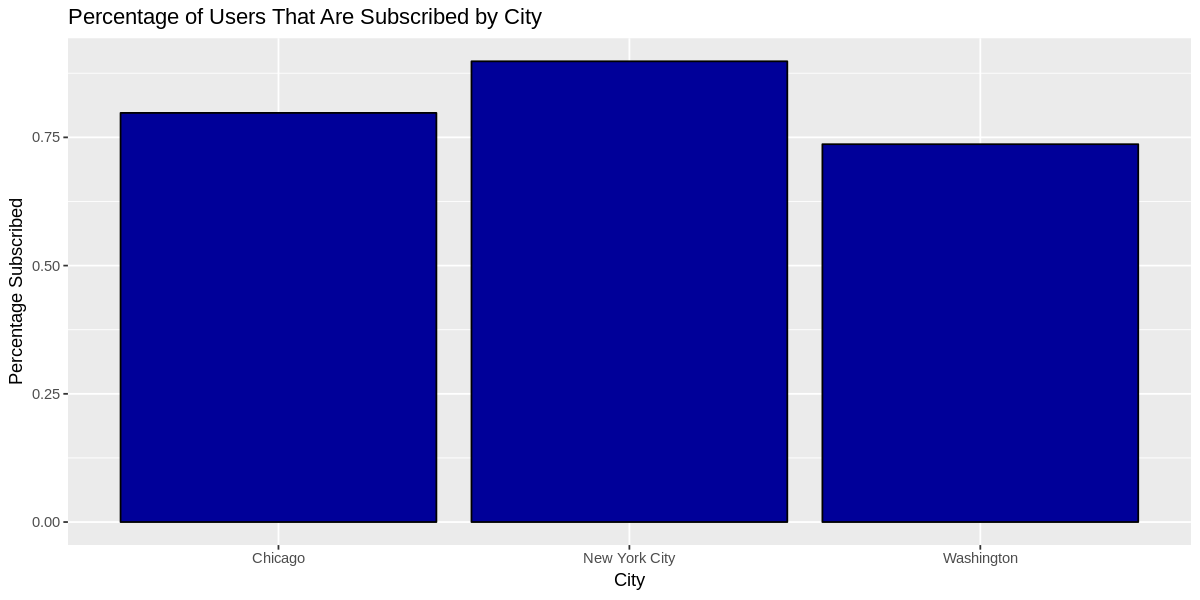

In [266]:
#Plotting our new data frame to help visualize our results.
ggplot(SubscriberData, aes(y=PercentSubscribed, x=City)) +
  geom_bar(position='dodge', stat='identity', fill='#000099', colour='black') +
  ggtitle('Percentage of Users That Are Subscribed by City') +
  xlab('City') +
  ylab('Percentage Subscribed')

> **The bar graph above shows the precent of bike share users that are subscribed by city. From most subscribers to least we have the following.**
- New York City (90%)
- Chicago (80%)
- Washington (74%)

## Question 3

**What is the most popular age of people using the bike share service in New York City and Chicago**

In [267]:
# Creating a data frame from using the table fuction on Birth.Year.
ny <- na.omit(ny)
nyBirth = as.data.frame(table(ny$Birth.Year))

# Displaying the most common birth year of users in New York City.
nyBirth[which.max(nyBirth$Freq),]

,Var1,Freq
69,1989,2050


In [268]:
# Creating a data frame from using the table fuction on Birth.Year.
chi <- na.omit(chi)
chiBirth = as.data.frame(table(chi$Birth.Year))

# Displaying the most common birth year of users in Chicago.
chiBirth[which.max(chiBirth$Freq),]

,Var1,Freq
54,1989,388


In [269]:
# Calculating the age of the most common 
2021 - 1989

[1] 32

#### 32 years old is the most common age of users. This is true for both New York City and Chicago.

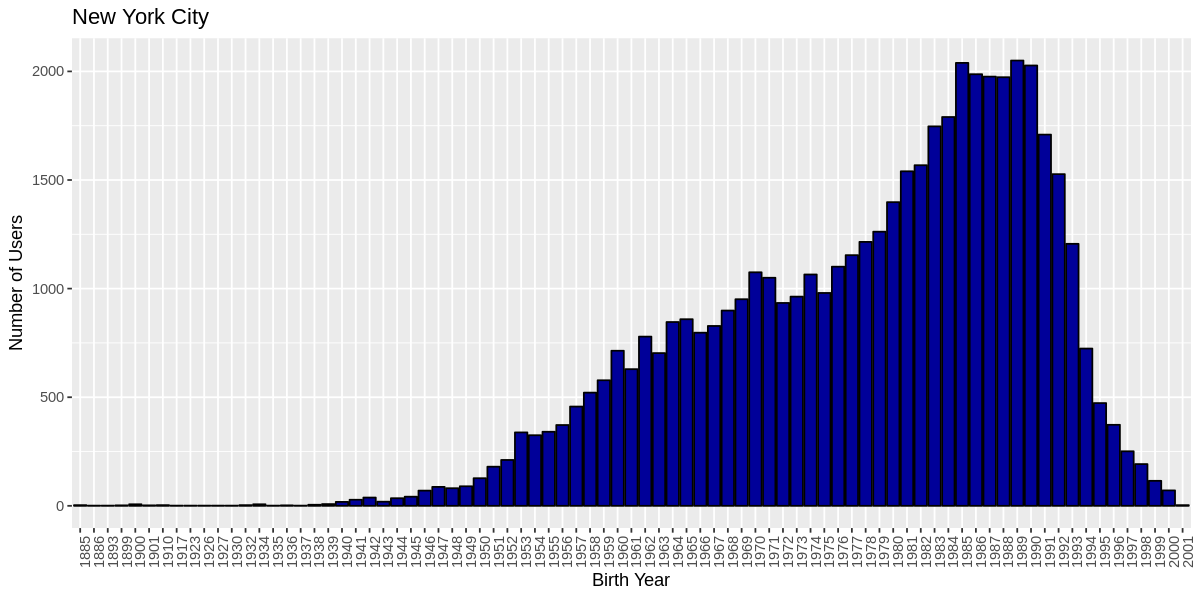

In [270]:
#Plotting our new data frame to help visualize our results.
ggplot(nyBirth, aes(y=Freq, x=Var1)) +
  geom_bar(position='dodge', stat='identity', fill='#000099', colour='black') +
  ggtitle('New York City') +
  xlab('Birth Year') +
  ylab('Number of Users') +
  theme(axis.text.x = element_text(angle = 90))

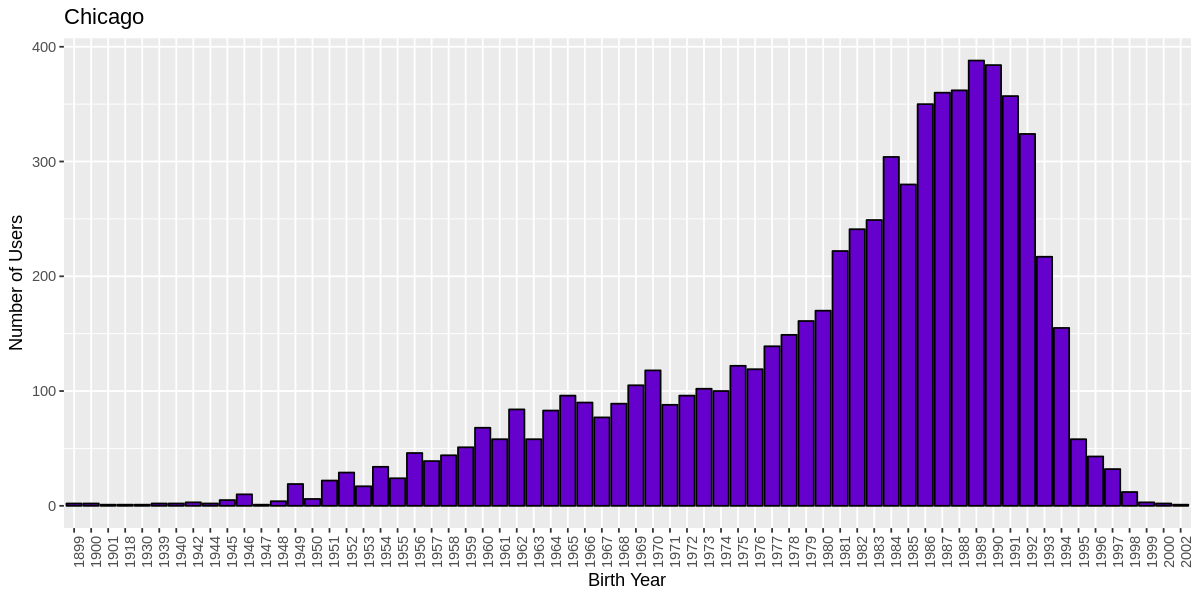

In [271]:
#Plotting our new data frame to help visualize our results.
ggplot(chiBirth, aes(y=Freq, x=Var1)) +
  geom_bar(position='dodge', stat='identity', fill='#6600cc', colour='black') +
  ggtitle('Chicago') +
  xlab('Birth Year') +
  ylab('Number of Users') +
  theme(axis.text.x = element_text(angle = 90))

**It is intresting that in both New York City and Chicago the most common age of users is 32. You can also see from the two graphs above that the increases and decreases in the amount of users within other birth years are very similar between the two cities as well.**

In [272]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')